In [1]:
import numpy as np # For Linear Alegbra
import pandas as pd #For Display Data
import matplotlib.pyplot as plt # For Visualization
from sklearn.model_selection import train_test_split  # For Split Data
from sklearn.impute import SimpleImputer # For clean Data
from sklearn.preprocessing import LabelEncoder # To convert categorical value to numerical value
from sklearn.metrics import confusion_matrix  # For Evaluate
import seaborn as sns # For Visualtization

In [2]:
# Read Data

df = pd.read_csv('/kaggle/input/gender-classification/gender_classification_v7.csv')

In [3]:
# Display Data

df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [4]:
# Check Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
# we user LabelEncoder from sklearn.preprosscing to convert categrical values to numerical values

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])

In [6]:
# Check correlation to know most important features 

cor = df.corr()
cor

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,-0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,0.754850
gender,-0.010767,0.334125,0.277190,0.758502,0.744147,0.743319,0.754850,1.000000


In [7]:
x = df.drop('gender', axis=1, inplace=False)
y= df['gender']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [9]:
import tensorflow as tf
import keras

kerasModel = keras.models.Sequential([
    keras.layers.Input(shape=(7,)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
]) 


kerasModel.compile( loss='binary_crossentropy', metrics=['accuracy'], )


# if regression ==> loss= 'mean_square_error', metrics=['mean_square_error']
# if Binary classification ==> loss='binary_crossentropy', metrics=['accuracy']
# if multi classification ==> loss='catgorical_crossentropy', metrics=['accuracy']

2024-06-21 16:40:42.249909: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 16:40:42.250064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 16:40:42.437657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
history = kerasModel.fit(x_train, y_train,
               validation_data=(x_test, y_test),
               epochs=100, # in simple way this mean how many time it should read data
               batch_size=32 # it use to divide data into groups so we can say that number 32 refer to how much every group contain
               , verbose=1, # display detailed result
               callbacks=[tf.keras.callbacks.EarlyStopping(
                   patience=10, #  a technique used to prevent overfitting and improve the model's performance on new 
                   monitor= 'val_accuracy', #if Regression monitor='val_loss'
                   restore_best_weights=True
               )])

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7199 - loss: 0.5897 - val_accuracy: 0.8362 - val_loss: 0.3865
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8768 - loss: 0.3288 - val_accuracy: 0.8851 - val_loss: 0.2853
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9019 - loss: 0.2320 - val_accuracy: 0.9191 - val_loss: 0.2010
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9423 - loss: 0.1573 - val_accuracy: 0.9441 - val_loss: 0.1594
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9522 - loss: 0.1338 - val_accuracy: 0.9491 - val_loss: 0.1338
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9506 - loss: 0.1141 - val_accuracy: 0.9500 - val_loss: 0.1194
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9477 - loss: 0.1108 - val_accuracy: 0.9510 - val_loss: 0.1177
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9504 - loss: 0.1030 - val_accu

In [11]:
y_predict = kerasModel.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [12]:
ModelLoss, ModelAccuracy = kerasModel.evaluate(x_test, y_test)

print(f'ModelLoss ==> {ModelLoss},\n ModelAccuracy ==> {ModelAccuracy}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9518 - loss: 0.1201 
ModelLoss ==> 0.11057528853416443,
 ModelAccuracy ==> 0.9540459513664246


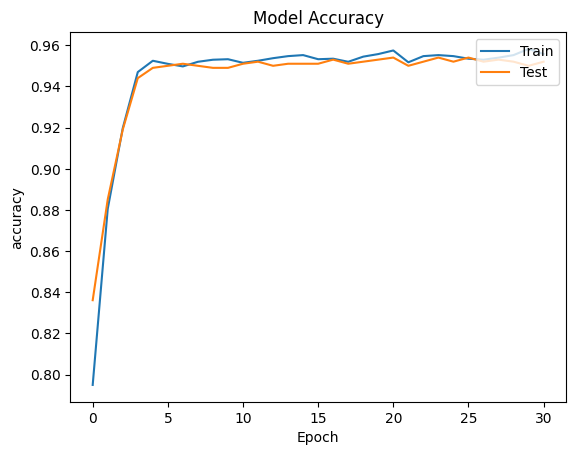

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'], loc='upper right')

In [14]:
# Round predicted values to be 0 or 1

y_pred = [np.round(i[0]) for i in y_predict]

In [15]:
# Dispaly first 5 rows

y_pred[:5]

[1.0, 0.0, 0.0, 1.0, 1.0]

In [16]:
# use Confusion Matrix to chck accuracy of model

cm = confusion_matrix(y_test, y_pred)

In [17]:
cm

array([[472,  30],
       [ 16, 483]])

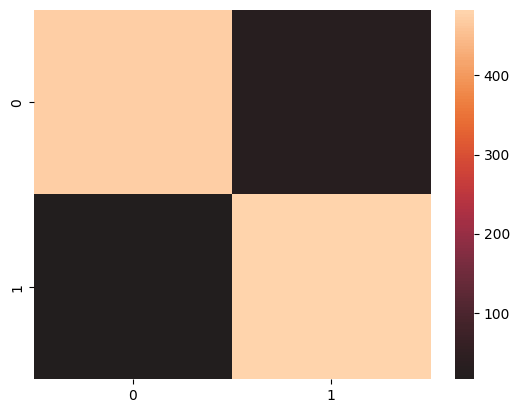

In [18]:
sns.heatmap(cm, center=True, edgecolor='blue')
plt.show()